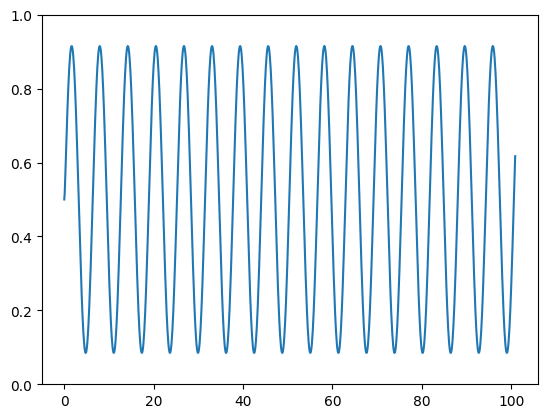

In [4]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
w1=500        # kg/min
w2=700        # kg/min
rho=1000      # kg/m3
V=.1           # m3
w=w1+w2       # kg/min
tau=rho*V/w   # min
K=w1/w

t,s =sym.symbols("t s")
x=sym.inverse_laplace_transform(K/(tau*s+1)*1/(s**2+1),s,t).evalf().simplify()
y =[]
time=np.arange(0,101,.1)
for i in time:
    y.append(0.5+x.subs(t,float(i)))
plt.ylim([0,1])
plt.plot(time,y)

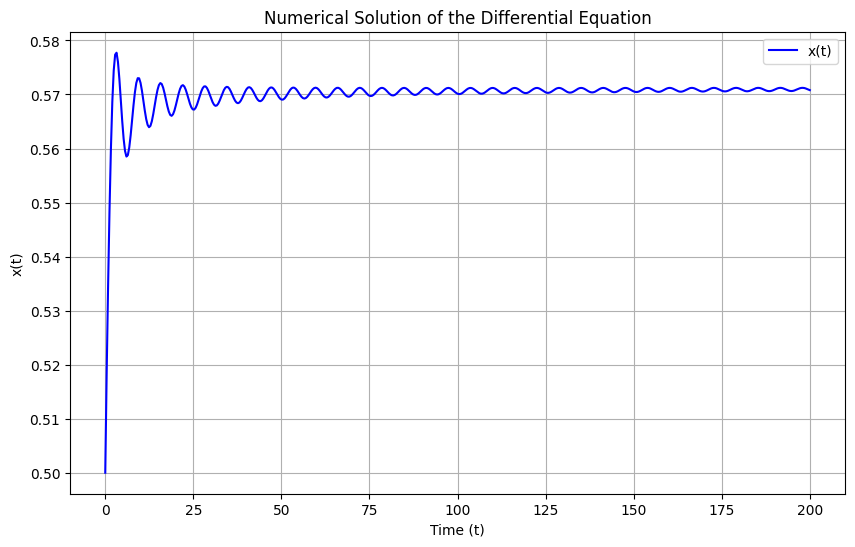

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Constants
a = 1000
b = 700
m = 290
n = 400

# Define the function for the integral
def integrand(u, a, b, m, n):
    term1 = (0.2 * m / a) * (1 + u)**(b/a - 1) * np.sin(u)
    term2 = (n / a) * (1 + u)**(b/a - 1)
    return term1 + term2

# Define the function for x(t)
def x(t):
    integral_result, _ = quad(integrand, 0, t, args=(a, b, m, n))
    return (integral_result + 0.5) / (1 + t)**(b/a)

# Time array from 0 to 100
time = np.linspace(0, 200, 500)
x_values = [x(t) for t in time]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(time, x_values, label='x(t)', color='blue')
plt.title('Numerical Solution of the Differential Equation')
plt.xlabel('Time (t)')
plt.ylabel('x(t)')
plt.grid()
plt.legend()
plt.show()